<a href="https://colab.research.google.com/github/almeida-cma/SI_Tema5/blob/main/T5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 38ms/step - accuracy: 0.8688 - loss: 0.4097 - val_accuracy: 0.9761 - val_loss: 0.0750
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.9804 - loss: 0.0649 - val_accuracy: 0.9899 - val_loss: 0.0308
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.9877 - loss: 0.0407 - val_accuracy: 0.9909 - val_loss: 0.0297
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step - accuracy: 0.9907 - loss: 0.0314 - val_accuracy: 0.9912 - val_loss: 0.0274
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9926 - loss: 0.0235 - val_accuracy: 0.9927 - val_loss: 0.0254
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9902 - loss: 0.0336
Loss no conjunto de teste: 0.025400931015610695
Acurácia no conjunto de teste: 0.9926999807357788


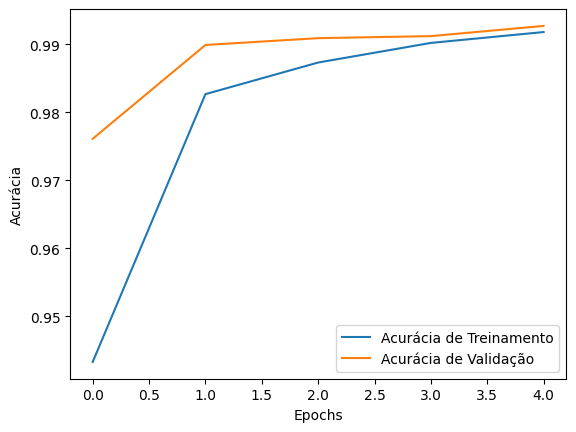

In [1]:
# Importando as bibliotecas necessárias
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Carregando e normalizando os dados do MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizando as imagens para a faixa [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Adicionando uma dimensão extra para representar o canal da imagem (grayscale)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Definindo o modelo da rede neural
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Primeira camada convolucional
    layers.MaxPooling2D((2, 2)),  # Camada de Pooling para reduzir a dimensionalidade
    layers.Conv2D(64, (3, 3), activation='relu'),  # Segunda camada convolucional
    layers.MaxPooling2D((2, 2)),  # Mais Pooling
    layers.Conv2D(64, (3, 3), activation='relu'),  # Terceira camada convolucional
    layers.Flatten(),  # Achatar os dados para a camada densa
    layers.Dense(64, activation='relu'),  # Camada densa com ReLU
    layers.Dropout(0.2),  # Dropout para evitar overfitting
    layers.Dense(10, activation='softmax')  # Camada de saída com Softmax
])

# Compilando o modelo
model.compile(optimizer='adam',  # Adam como algoritmo de otimização
              loss='sparse_categorical_crossentropy',  # Função de perda Cross-Entropy
              metrics=['accuracy'])  # Métrica de acurácia

# Treinando o modelo
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Avaliando o modelo nos dados de teste
test_loss, test_acc = model.evaluate(x_test, y_test)

# Exibindo os resultados
print(f"Loss no conjunto de teste: {test_loss}")
print(f"Acurácia no conjunto de teste: {test_acc}")

# Exibindo o gráfico de treinamento
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Epochs')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')
plt.show()
